# Regression Plots

In [1]:
%matplotlib inline

from __future__ import print_function
from statsmodels.compat import lzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Duncan's Prestige Dataset

### Load the Data

We can use a utility function to load any R dataset available from the great <a href="http://vincentarelbundock.github.com/Rdatasets/">Rdatasets package</a>.

In [2]:
prestige = sm.datasets.get_rdataset("Duncan", "car", cache=True).data

In [3]:
prestige.head()

,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90


In [4]:
prestige_model = ols("prestige ~ income + education", data=prestige).fit()

In [5]:
print(prestige_model.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Fri, 16 Dec 2016   Prob (F-statistic):           8.65e-17
Time:                        08:01:08   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.1

### Influence plots

Influence plots show the (externally) studentized residuals vs. the leverage of each observation as measured by the hat matrix.

Externally studentized residuals are residuals that are scaled by their standard deviation where 

$$var(\hat{\epsilon}_i)=\hat{\sigma}^2_i(1-h_{ii})$$

with

$$\hat{\sigma}^2_i=\frac{1}{n - p - 1 \;\;}\sum_{j}^{n}\;\;\;\forall \;\;\; j \neq i$$

$n$ is the number of observations and $p$ is the number of regressors. $h_{ii}$ is the $i$-th diagonal element of the hat matrix

$$H=X(X^{\;\prime}X)^{-1}X^{\;\prime}$$

The influence of each point can be visualized by the criterion keyword argument. Options are Cook's distance and DFFITS, two measures of influence.

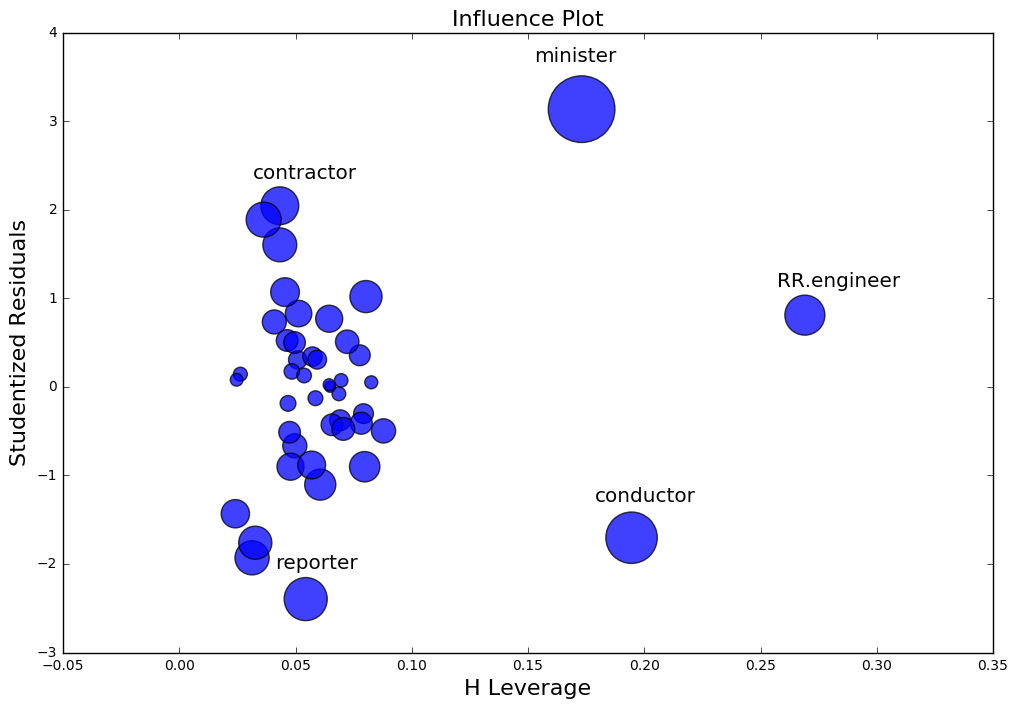

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(prestige_model, ax=ax, criterion="cooks")

As you can see there are a few worrisome observations. Both contractor and reporter have low leverage but a large residual. <br />
RR.engineer has small residual and large leverage. Conductor and minister have both high leverage and large residuals, and, <br />
therefore, large influence.

### Partial Regression Plots

Since we are doing multivariate regressions, we cannot just look at individual bivariate plots to discern relationships. <br />
Instead, we want to look at the relationship of the dependent variable and independent variables conditional on the other <br />
independent variables. We can do this through using partial regression plots, otherwise known as added variable plots. <br />

In a partial regression plot, to discern the relationship between the response variable and the $k$-th variabe, we compute <br />
the residuals by regressing the response variable versus the independent variables excluding $X_k$. We can denote this by <br />
$X_{\sim k}$. We then compute the residuals by regressing $X_k$ on $X_{\sim k}$. The partial regression plot is the plot <br />
of the former versus the latter residuals. <br />

The notable points of this plot are that the fitted line has slope $\beta_k$ and intercept zero. The residuals of this plot <br />
are the same as those of the least squares fit of the original model with full $X$. You can discern the effects of the <br />
individual data values on the estimation of a coefficient easily. If obs_labels is True, then these points are annotated <br />
with their observation label. You can also see the violation of underlying assumptions such as homooskedasticity and <br />
linearity.

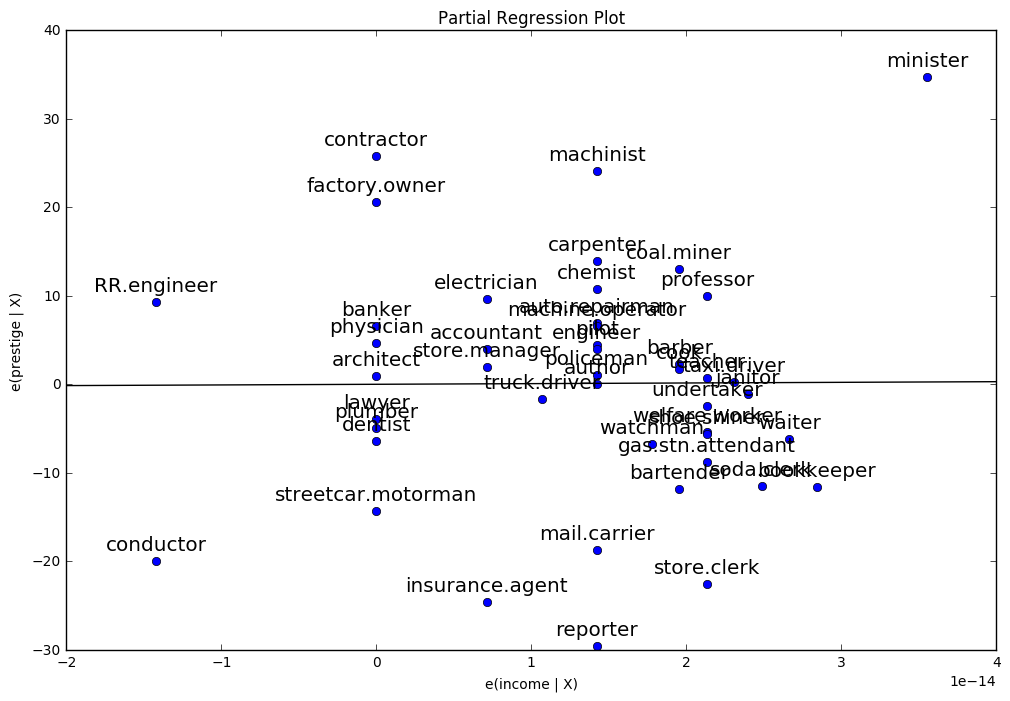

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_partregress("prestige", "income", ["income", "education"], data=prestige, ax=ax)

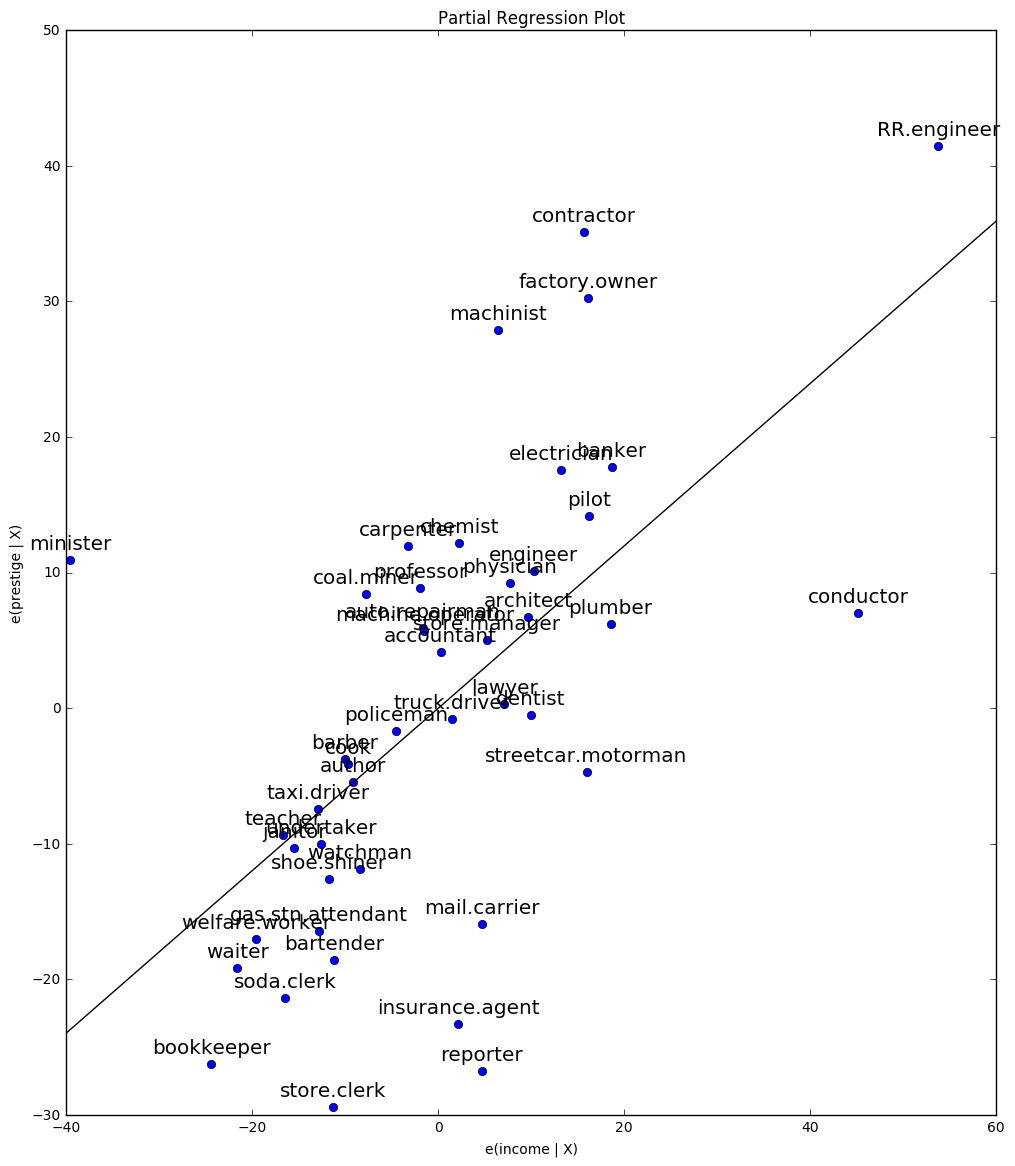

In [8]:
fix, ax = plt.subplots(figsize=(12,14))
fig = sm.graphics.plot_partregress("prestige", "income", ["education"], data=prestige, ax=ax)

As you can see the partial regression plot confirms the influence of conductor, minister, and RR.engineer on the partial relationship between income and prestige. The cases greatly decrease the effect of income on prestige. Dropping these cases confirms this.

In [9]:
subset = ~prestige.index.isin(["conductor", "RR.engineer", "minister"])
prestige_model2 = ols("prestige ~ income + education", data=prestige, subset=subset).fit()
print(prestige_model2.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     138.1
Date:                Fri, 16 Dec 2016   Prob (F-statistic):           2.02e-18
Time:                        08:01:10   Log-Likelihood:                -160.59
No. Observations:                  42   AIC:                             327.2
Df Residuals:                      39   BIC:                             332.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -6.3174      3.680     -1.717      0.0

For a quick check of all the regressors, you can use plot_partregress_grid. These plots will not label the <br />
points, but you can use them to identify problems and then use plot_partregress to get more information.

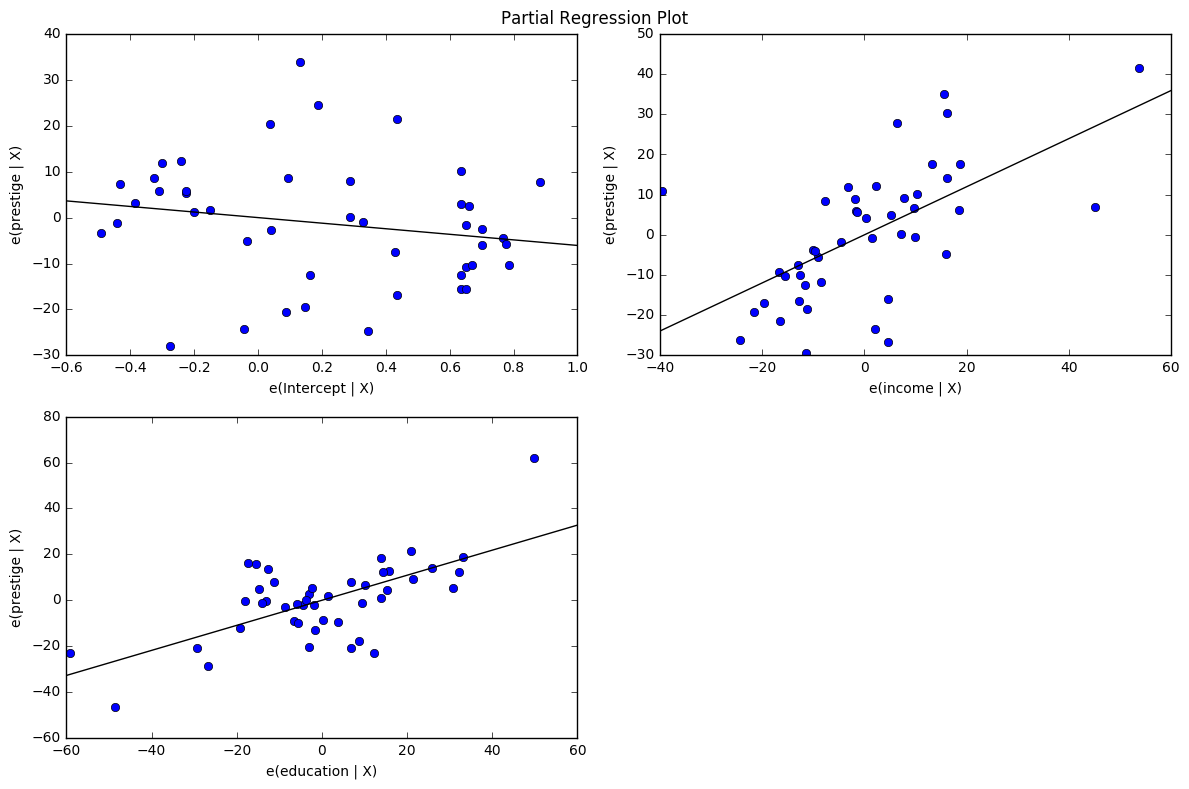

In [10]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(prestige_model, fig=fig)

### Component-Component plus Residual (CCPR) Plots

The CCPR plot provides a way to judge the effect of one regressor on the <br />
response variable by taking into account the effects of the other  <br />
independent variables. The partial residuals plot is defined as  <br />
$\text{Residuals} + B_iX_i \text{ }\text{ }$   versus $X_i$. The component adds $B_iX_i$ versus  <br />
$X_i$ to show where the fitted line would lie. Care should be taken if $X_i$  <br />
is highly correlated with any of the other independent variables. If this  <br />
is the case, the variance evident in the plot will be an underestimate of  <br />
the true variance.

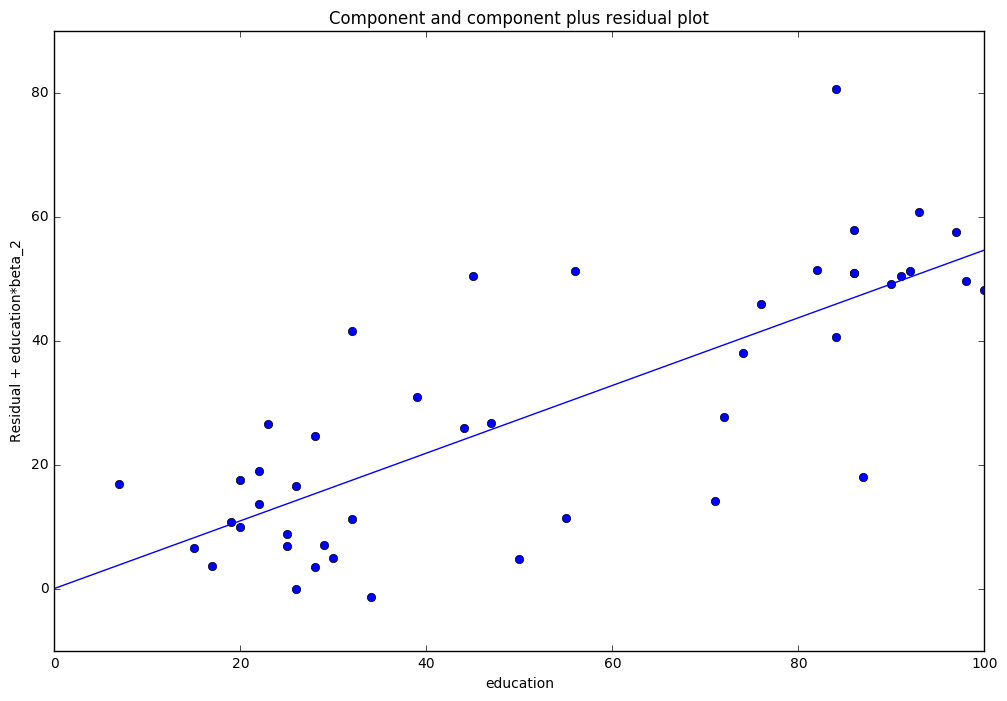

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_ccpr(prestige_model, "education", ax=ax)

As you can see the relationship between the variation in prestige explained by education conditional on income seems to be linear, though you can see there are some observations that are exerting considerable influence on the relationship. We can quickly look at more than one variable by using plot_ccpr_grid.

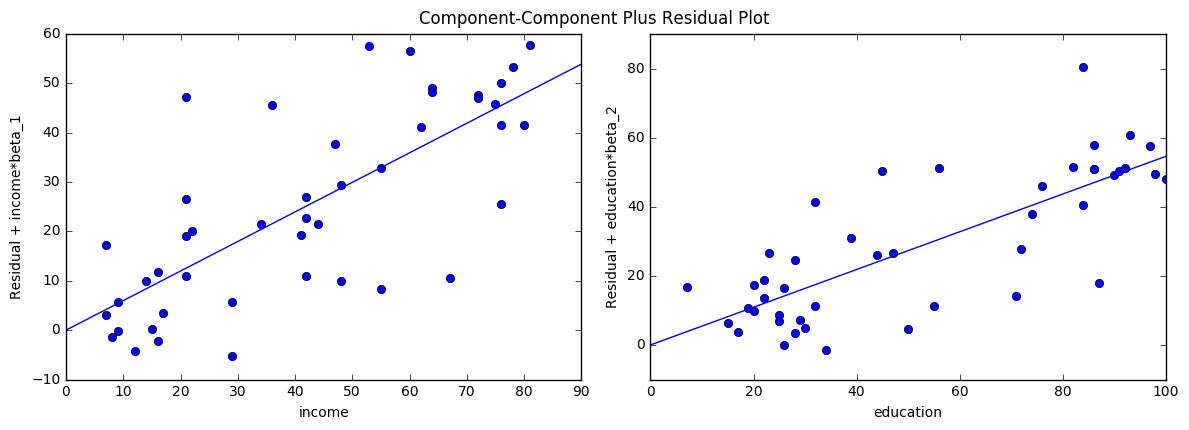

In [12]:
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_ccpr_grid(prestige_model, fig=fig)

### Regression Plots

The plot_regress_exog function is a convenience function that gives a 2x2 plot containing the dependent variable and fitted values with confidence intervals vs. the independent variable chosen, the residuals of the model vs. the chosen independent variable, a partial regression plot, and a CCPR plot. This function can be used for quickly checking modeling assumptions with respect to a single regressor.

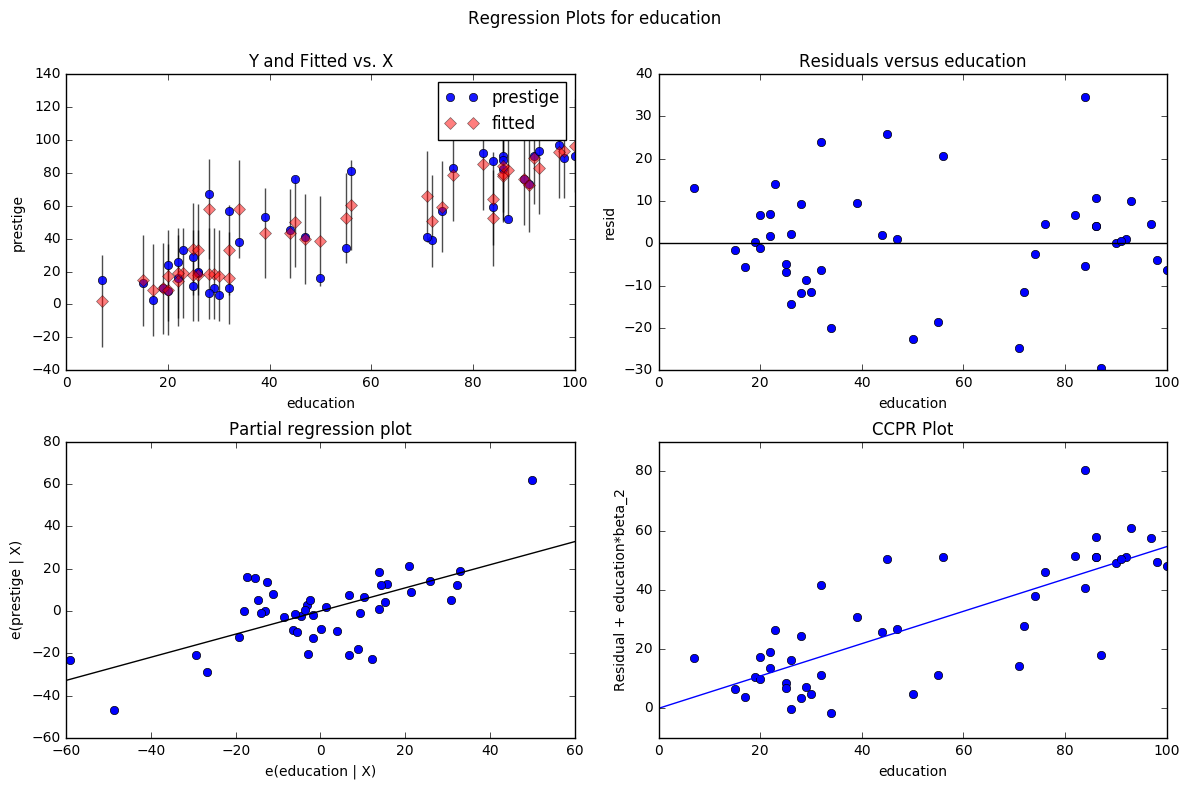

In [13]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(prestige_model, "education", fig=fig)

### Fit Plot

The plot_fit function plots the fitted values versus a chosen independent variable. It includes prediction confidence intervals and optionally plots the true dependent variable.

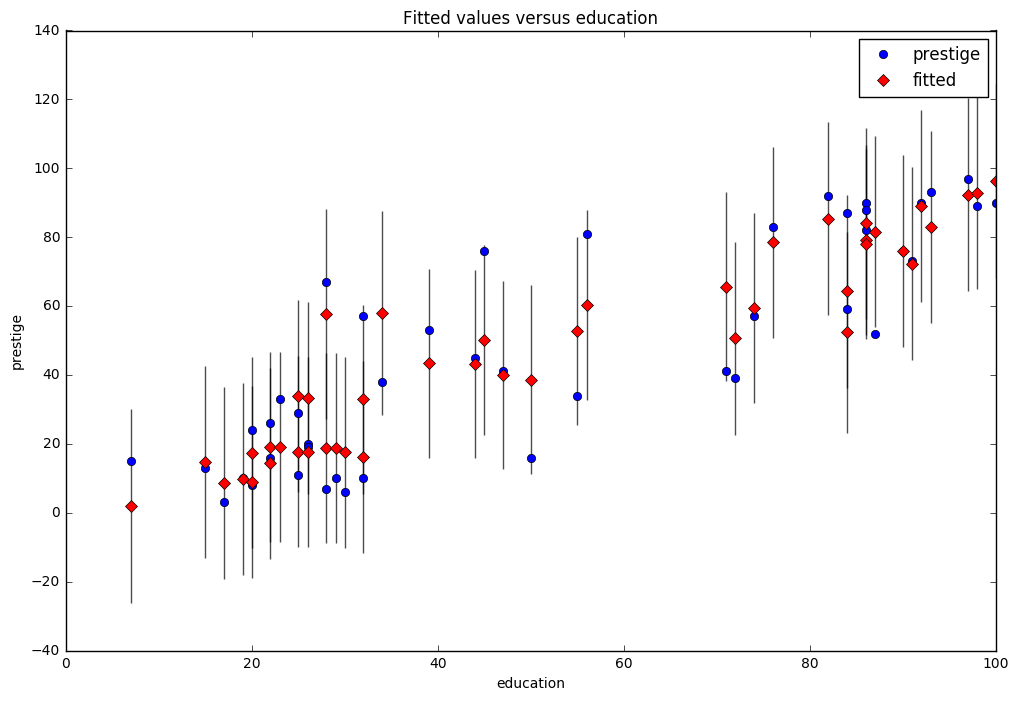

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(prestige_model, "education", ax=ax)

## Statewide Crime 2009 Dataset

Compare the following to http://www.ats.ucla.edu/stat/stata/webbooks/reg/chapter4/statareg_self_assessment_answers4.htm

Though the data here is not the same as in that example. You could run that example by uncommenting the necessary cells below.

In [15]:
#dta = pd.read_csv("http://www.stat.ufl.edu/~aa/social/csv_files/statewide-crime-2.csv")
#dta = dta.set_index("State", inplace=True).dropna()
#dta.rename(columns={"VR" : "crime",
#                    "MR" : "murder",
#                    "M"  : "pctmetro",
#                    "W"  : "pctwhite",
#                    "H"  : "pcths",
#                    "P"  : "poverty",
#                    "S"  : "single"
#                    }, inplace=True)
#
#crime_model = ols("murder ~ pctmetro + poverty + pcths + single", data=dta).fit()

In [16]:
dta = sm.datasets.statecrime.load_pandas().data

In [17]:
crime_model = ols("murder ~ urban + poverty + hs_grad + single", data=dta).fit()
print(crime_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 murder   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     50.08
Date:                Fri, 16 Dec 2016   Prob (F-statistic):           3.42e-16
Time:                        08:01:13   Log-Likelihood:                -95.050
No. Observations:                  51   AIC:                             200.1
Df Residuals:                      46   BIC:                             209.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -44.1024     12.086     -3.649      0.0

### Partial Regression Plots

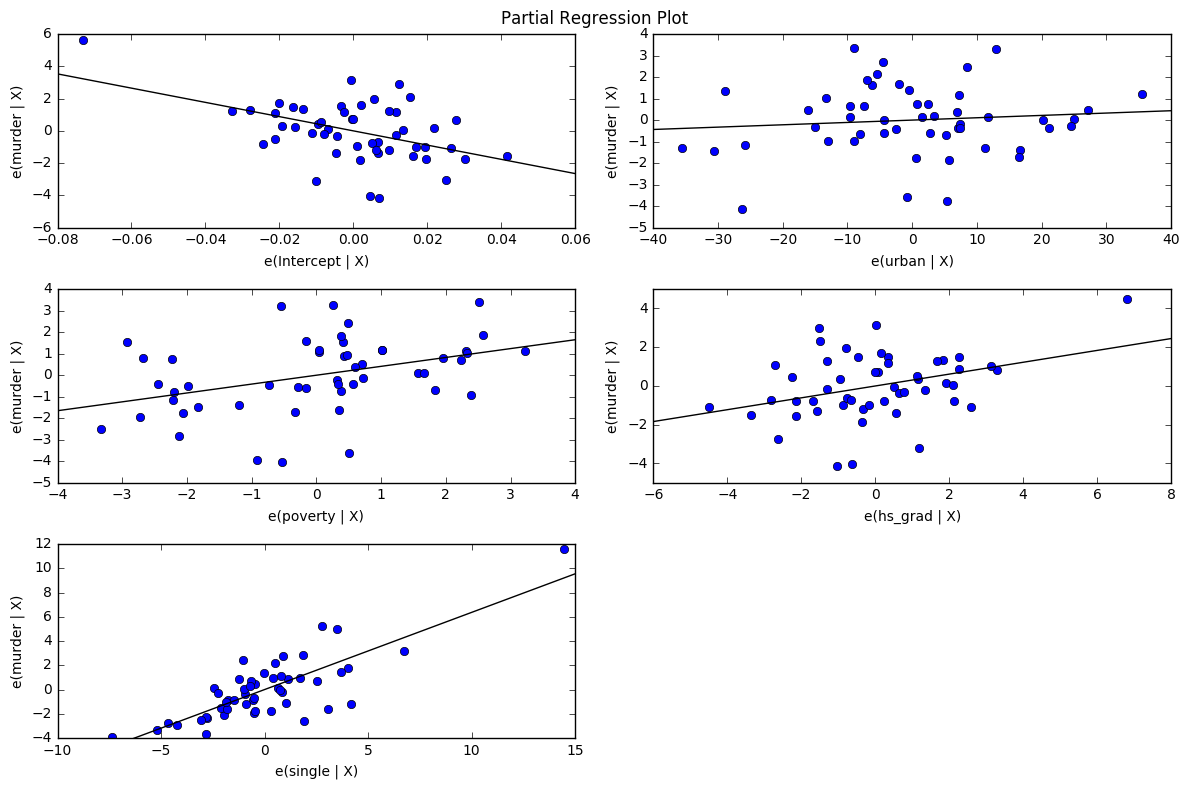

In [18]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(crime_model, fig=fig)

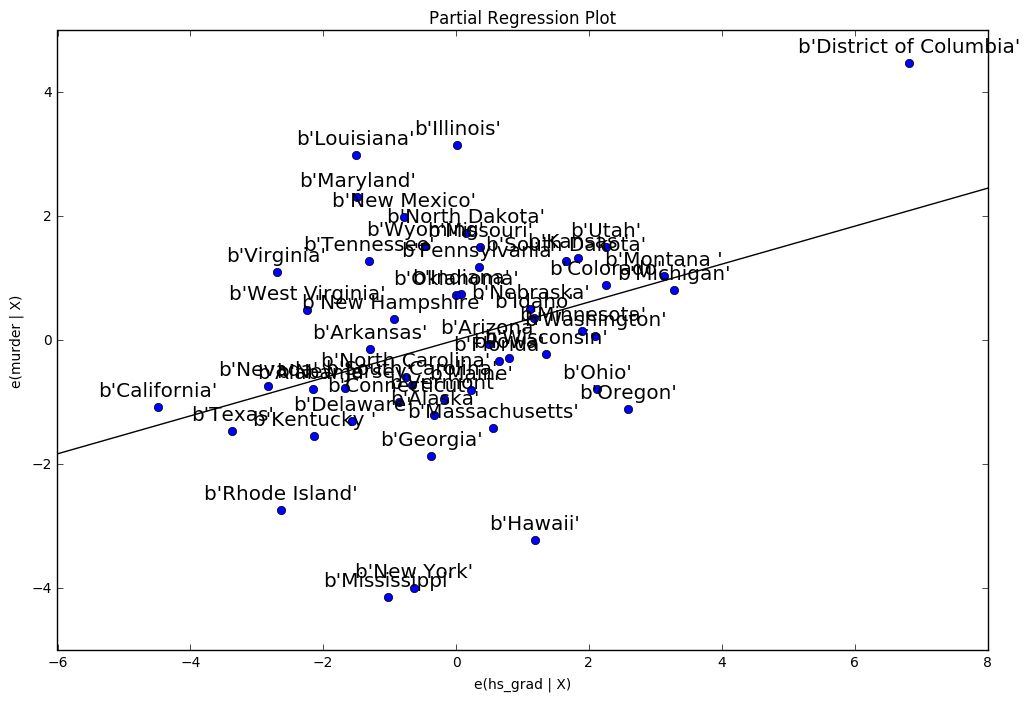

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_partregress("murder", "hs_grad", ["urban", "poverty", "single"],  ax=ax, data=dta)

### Leverage-Resid<sup>2</sup> Plot

Closely related to the influence_plot is the leverage-resid<sup>2</sup> plot.

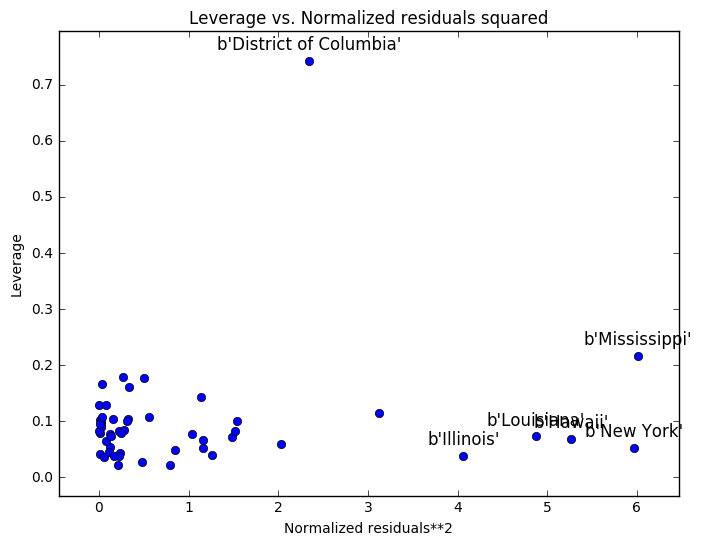

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
fig = sm.graphics.plot_leverage_resid2(crime_model, ax=ax)

### Influence Plot

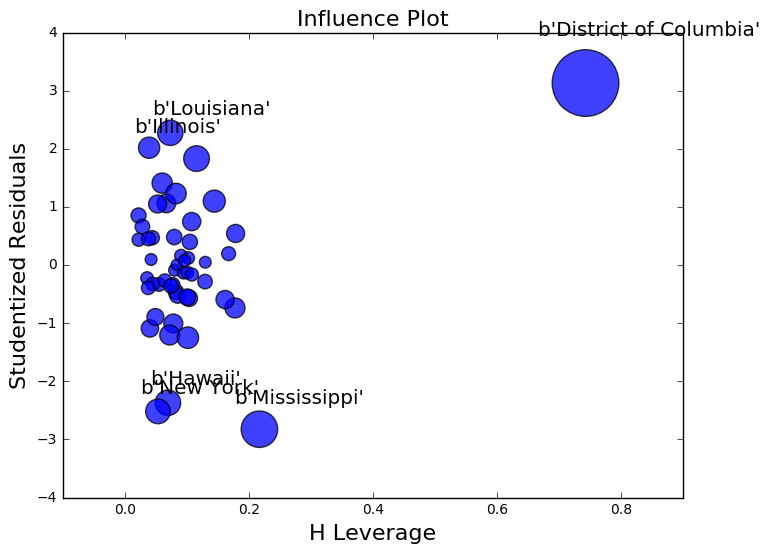

In [21]:
fig, ax = plt.subplots(figsize=(8,6))
fig = sm.graphics.influence_plot(crime_model, ax=ax)

### Using robust regression to correct for outliers.

Part of the problem here in recreating the Stata results is that M-estimators are not robust to leverage points. MM-estimators should do better with this examples.

In [22]:
from statsmodels.formula.api import rlm

In [23]:
rob_crime_model = rlm("murder ~ urban + poverty + hs_grad + single", data=dta, 
                      M=sm.robust.norms.TukeyBiweight(3)).fit(conv="weights")
print(rob_crime_model.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                 murder   No. Observations:                   51
Model:                            RLM   Df Residuals:                       46
Method:                          IRLS   Df Model:                            4
Norm:                   TukeyBiweight                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 16 Dec 2016                                         
Time:                        08:01:18                                         
No. Iterations:                    50                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -4.2986      9.494     -0.453      0.6

In [24]:
#rob_crime_model = rlm("murder ~ pctmetro + poverty + pcths + single", data=dta, M=sm.robust.norms.TukeyBiweight()).fit(conv="weights")
#print(rob_crime_model.summary())

There isn't yet an influence diagnostics method as part of RLM, but we can recreate them. (This depends on the status of [issue #888](https://github.com/statsmodels/statsmodels/issues/808))

In [25]:
weights = rob_crime_model.weights
idx = weights > 0
X = rob_crime_model.model.exog[idx.values]
ww = weights[idx] / weights[idx].mean()
hat_matrix_diag = ww*(X*np.linalg.pinv(X).T).sum(1)
resid = rob_crime_model.resid
resid2 = resid**2
resid2 /= resid2.sum()
nobs = int(idx.sum())
hm = hat_matrix_diag.mean()
rm = resid2.mean()

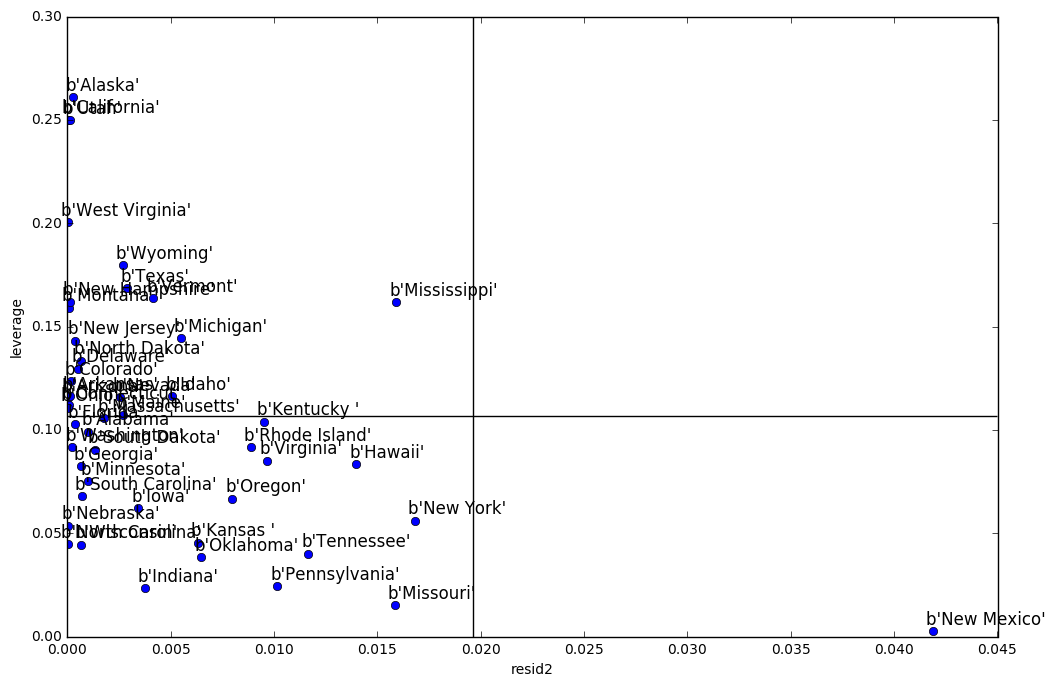

In [26]:
from statsmodels.graphics import utils
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(resid2[idx], hat_matrix_diag, 'o')
ax = utils.annotate_axes(range(nobs), labels=rob_crime_model.model.data.row_labels[idx], 
                    points=lzip(resid2[idx], hat_matrix_diag), offset_points=[(-5,5)]*nobs,
                    size="large", ax=ax)
ax.set_xlabel("resid2")
ax.set_ylabel("leverage")
ylim = ax.get_ylim()
ax.vlines(rm, *ylim)
xlim = ax.get_xlim()
ax.hlines(hm, *xlim)
ax.margins(0,0)